In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [21]:
df = pd.read_csv('ca_counties_employment_2020.csv', sep=',')
counties_df = df.copy()
counties_df.area_name = counties_df.area_name.apply(lambda x: x.split('county')[0])
counties_df.rename(columns={'area_name':'county'}, inplace=True)
counties_df['month'] = counties_df.date.apply(lambda x: x.split('-')[1])
counties_df.drop(columns='Unnamed: 0').head()

,county,date,year,month,labor_force,employment,unemployment,unemployment_rate
0,alameda,2020-01-01,2020,01,841300,815500,25700,0.031
1,alpine,2020-01-01,2020,01,650,620,30,0.046
2,amador,2020-01-01,2020,01,14860,14160,700,0.047
3,butte,2020-01-01,2020,01,97800,92400,5400,0.056
4,calaveras,2020-01-01,2020,01,21560,20630,930,0.043


In [22]:
#Created a pivot table to show unemployment data for county by month
counties_month_df = counties_df.pivot_table(values='unemployment_rate', index='county', columns='month')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text xticklabel objects>)

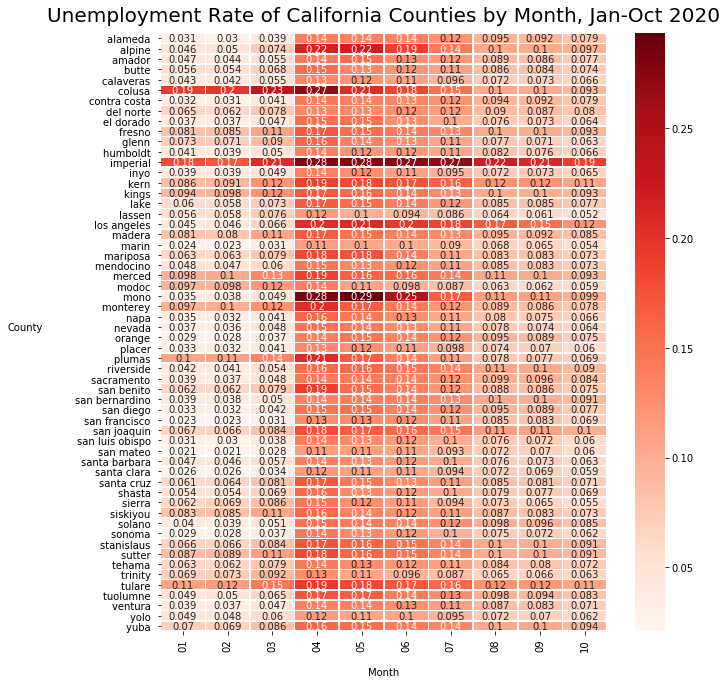

In [23]:
figure, axes = plt.subplots(figsize=(10,11))
sns.heatmap(counties_month_df, annot=True, linewidths=.5, ax=axes, cmap='Reds')
axes.axes.set_title('Unemployment Rate of California Counties by Month, Jan-Oct 2020', fontsize=20, y=1.01)
axes.axes.set_ylabel('County', labelpad=50, rotation=0)
axes.axes.set_xlabel('Month', labelpad=16)
plt.xticks(rotation=90)

**BLURB:**

This heatmap gives a visual representation of unemployment data based on county from January to October 2020. Based off of the visualization, we can see a dramatic increase across all counties between March and April, but it particularly hitting Los Angeles, Mono, and Alpine Counties. During the months after the PPP Loans were distributed, most counties experienced small decreases in the unemployment rate, with a notable decrease in August compared to the rest of the summer. 